# Data Analysis on the Haberman dataset

### About the dataset
        The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of       Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
        
        
        Number of Instances: 306

        Number of Attributes: 4 (including the class attribute)

        Attribute Information:

        Age of patient at time of operation (numerical)
        Patient's year of operation (year - 1900, numerical)
        Number of positive axillary nodes detected (numerical)
        Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within     5 years


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels import robust
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# (1) Extraction of the basic informations from the data.

In [2]:
haberman = pd.read_csv('haberman.csv',
                        names=['age_of_patients',
                               'year_of_treatment',
                               'positive_axillary_nodes',
                               'survival_status_after_5_years'])

haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'] \
    .map({1:"yes", 2:"no"})
haberman['survival_status_after_5_years'] = haberman['survival_status_after_5_years'] \
    .astype('category')


In [3]:
print(haberman.shape)

(306, 4)


In [7]:
print(haberman['age_of_patients'].describe())

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age_of_patients, dtype: float64


In [8]:
print(haberman['year_of_treatment'].describe())

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: year_of_treatment, dtype: float64


In [9]:
print(haberman.columns)

Index(['age_of_patients', 'year_of_treatment', 'positive_axillary_nodes',
       'survival_status_after_5_years'],
      dtype='object')


In [10]:
print(haberman['survival_status_after_5_years'].value_counts())

yes    225
no      81
Name: survival_status_after_5_years, dtype: int64


# Observations
  #### (1) There are no missing values in this data set.
  #### (2) This dataset contains information about the age of the patients between the age 30 to 83 with the mean age of about 52.45.
  #### (3) This dataset contains information about the surgery which were conducted between 1958 to 1970 with the mean year of 1962.
  #### (4) We get to know that the dataset is very much unbalanced as class attribute number one which comprise of the patients who survived more than 5 years after the operation is about 73% while that of the class attribute two which contist the number of patients who died in less than five years is only about 27%.

# (2) Plotting of 2-D and 3-D scatter plot to try to gain more intuition.
### (2.1) 2-D scatter plot

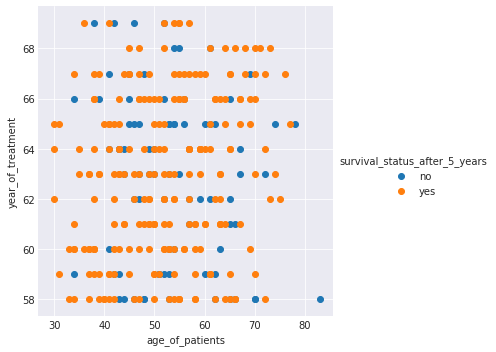

In [11]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=5) \
   .map(plt.scatter, "age_of_patients", "year_of_treatment") \
   .add_legend()
plt.show()

### (2.2) 3-D scatter plot

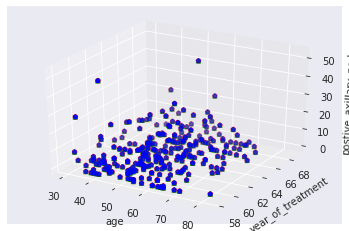

In [12]:
X = np.array(haberman['age_of_patients'])
Y = np.array(haberman['year_of_treatment'])
Z = np.array(haberman['positive_axillary_nodes'])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for c, m in [('r', 'o'), ('g', '^'), ('b', 'p')]:
        ax.scatter(X, Y, Z,c =c,marker = m)

ax.set_xlabel('age')
ax.set_ylabel('year_of_treatment')
ax.set_zlabel('postive_axillary_nodes')
plt.show()

# Observations
 #### (1) By looking at the 2-D scatter plot it is impossible to draw a line that distinguishes one class from all the others because many of the points are upon each other and it very much difficult to distinguish them apart. 
 #### (2) Also by looking at the 3-D scatter plot we can't distinguish one class from another.
 

# (3) Bivariate Analysis through Pair Plots.

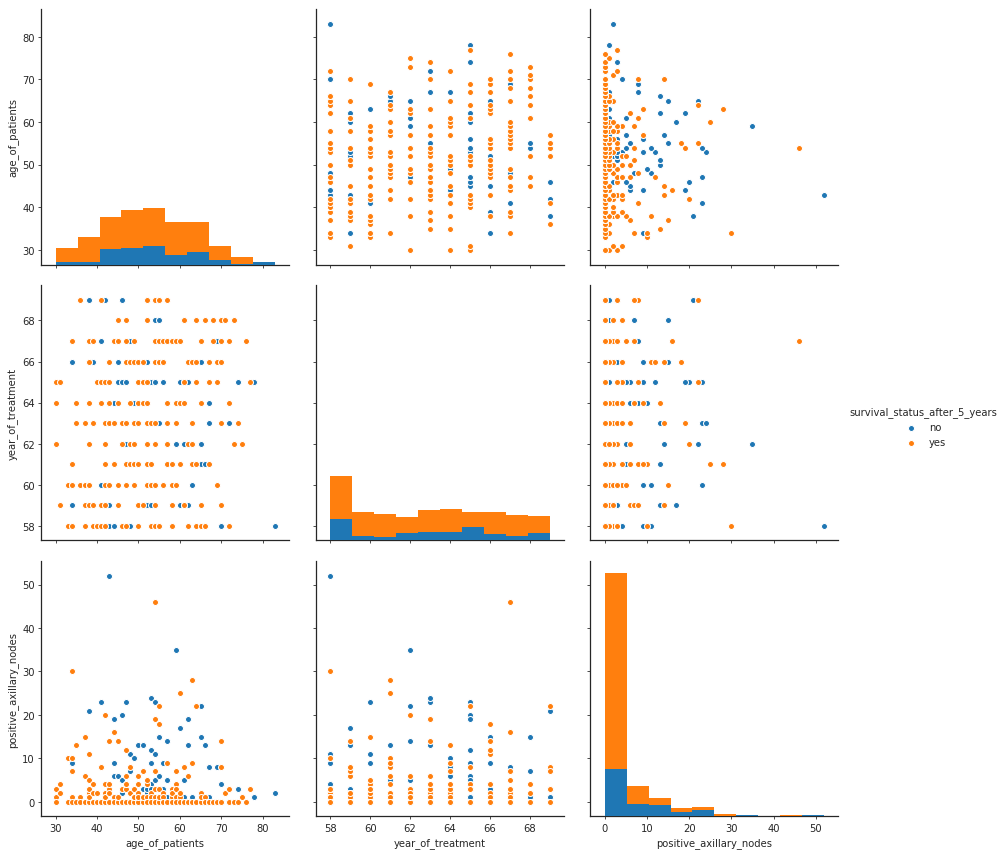

In [13]:
plt.close()
sns.set_style("ticks", {"xtick.major.size": 3, "ytick.major.size": 3})
sns.pairplot(haberman, hue="survival_status_after_5_years", size=4)
plt.show()

# Observations
  #### There isn't any single plot through which we can determine any single independent variable which can be more useful than the others.
  

# (4) Univariate Analysis Using Histograms and Pdfs

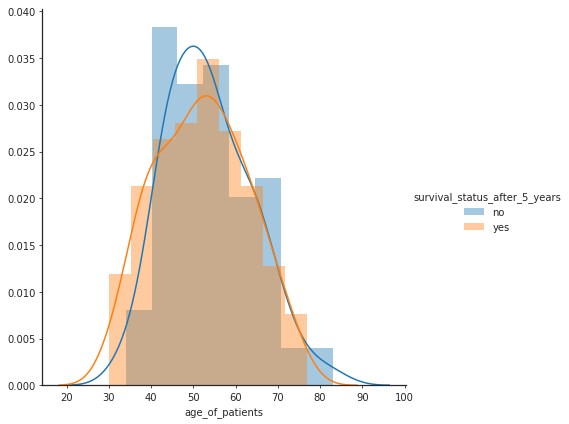

In [14]:
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=6) \
   .map(sns.distplot, "age_of_patients") \
   .add_legend()
plt.show()

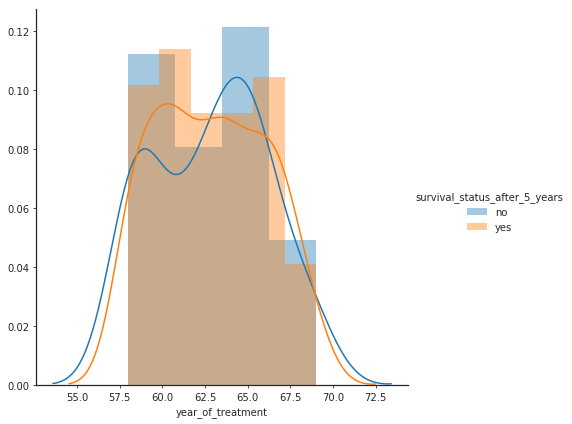

In [15]:
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=6) \
   .map(sns.distplot, "year_of_treatment") \
   .add_legend()
plt.show()

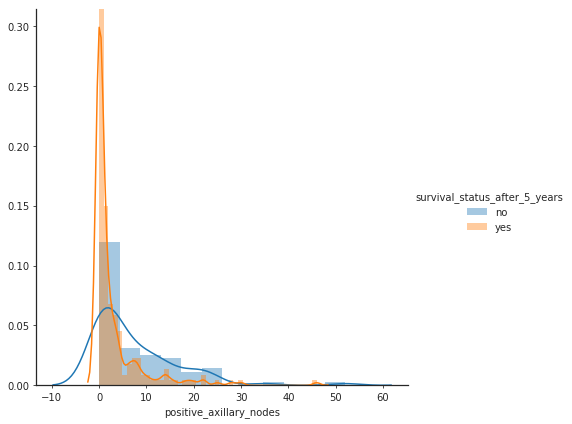

In [16]:
sns.FacetGrid(haberman, hue="survival_status_after_5_years", size=6) \
   .map(sns.distplot, "positive_axillary_nodes") \
   .add_legend()
plt.show()

# Observations
  #### (1) By looking at the histogram of the age of the patients we can't see a clear seperation between the two attributes of the surival status but here we say that all the patients between the age of 30 to about 33 survived more than 5 years and all the patients who were between the age of 78 to 83 didn't survive more than 5 years.
  #### (2) The histogram of the year of treatment of the patients also doesn't consist a well defined boundary between them as they are also overlapping each other. Here the overlapping is much more than the other two Pdfs drawn.
  #### (3) Similarly the histogram of positive lymph nodes is not very well distinguished but here atleast we can say that the standard deviation of the plot of patients who survived more 5 years is very much less than that of the patients who survived less than 5 years. From this plot we can also say that about 30% of data points for the patients who survived more than 5 years after the surgery is between 0 to about 5 on the X-axis and about 12.5% of the points for the patients who survived less than 5 years lie between 0 and 5 on X-axis.


# (5) Diving deeper through CDF

In [17]:
# Getting all rows with status as yes
yes = haberman.loc[haberman["survival_status_after_5_years"] == "yes"]
# Getting all rows with status as no
no = haberman.loc[haberman["survival_status_after_5_years"] == "no"]


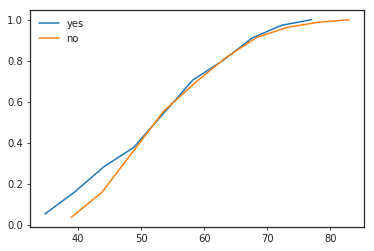

In [18]:
# CDF of age_of_patients

counts, bin_edges = np.histogram(yes['age_of_patients'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'yes')

counts, bin_edges = np.histogram(no['age_of_patients'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'no')




plt.legend()

plt.show()

# Observations
  #### (1) From this graph we can say that the patients who survived more than 5 years after the treatment and similarly the patients who couldn't survive more than 5 years have the same 50% value of about 55 years on the X-axis.
  #### (2) About all the patients who survived more than 5 years after the treatment were between 30 to 36 and 70 to 73 years of age.
  #### (3) None of the patients who more than 80 years of age could survive more than 5 years after the treatment.

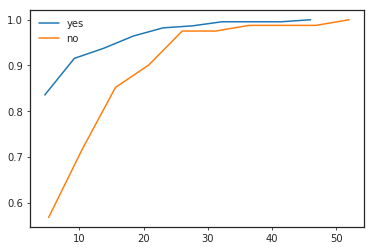

In [19]:
# CDF of positive_axillary_nodes

counts, bin_edges = np.histogram(yes['positive_axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'yes')

counts, bin_edges = np.histogram(no['positive_axillary_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label = 'no')



plt.legend()


plt.show()

# Observations
  #### (1) Patients who survived more than 5 years after the treatment covered 90% of positive axillary nodes at 10 and 95% of positive axillary nodes at 20.
  #### (2) Patients who couldn't survive more than 5 years after the treatment covered 90% of positive axillary nodes at 20 and 95% of positive axillary nodes at 25.

# NOTE:-
 #### Not taking into account the cdf of year of treatment because it wouldn't provide any details about how many patients survived or died after 5 years of treatment just by knowing his/her year of treatment.

# (6) Mean and Standard Deviation

In [20]:
print("Means with survival status as \'yes':")
print('age:')
print(np.mean(yes["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.mean(yes["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.mean(yes["positive_axillary_nodes"]))
print('*********************')
print("\nMeans with survival status as \'no':")
print('age:')
print(np.mean(no["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.mean(no["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.mean(no["positive_axillary_nodes"]))
print('*********************')
print("\nStd-dev with survival status as \'yes':");
print('age:')
print(np.std(yes["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.std(yes["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.std(yes["positive_axillary_nodes"]))
print('*********************')
print("\nStd-dev with survival status as \'no':")
print('age:')
print(np.std(no["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.std(no["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.std(no["positive_axillary_nodes"]))
print('*********************')


Means with survival status as 'yes':
age:
52.01777777777778
*********************
treatment year:
62.86222222222222
*********************
positive axillary nodes:
2.7911111111111113
*********************

Means with survival status as 'no':
age:
53.67901234567901
*********************
treatment year:
62.82716049382716
*********************
positive axillary nodes:
7.45679012345679
*********************

Std-dev with survival status as 'yes':
age:
10.98765547510051
*********************
treatment year:
3.2157452144021956
*********************
positive axillary nodes:
5.857258449412131
*********************

Std-dev with survival status as 'no':
age:
10.10418219303131
*********************
treatment year:
3.3214236255207883
*********************
positive axillary nodes:
9.128776076761632
*********************


# Observations
  #### (1) Mean value of the age of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years. Similarly the standard deviation of the age of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years.
  #### (2) Mean value of the treatment year of the patients who could survive more than 5 years is more than that the paients who couldn't survive more than 5 years. The Standard deviation value of the treatment year of the patients who could survive more than 5 years is less than that the paients who couldn't survive more than 5 years.
  #### (3)  Mean value of the positive axillary nodes of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years. Similarly the standard deviation of the positive axillary nodes of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years.

# (7) Percentile and Quantiles

In [21]:
print("Medians with survival status as \'yes':")
print('age:')
print(np.median(yes["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.median(yes["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.median(yes["positive_axillary_nodes"]))
print('*********************')
print("\nMedians with survival status as \'no':")
print('age:')
print(np.median(no["age_of_patients"]))
print('*********************')
print('treatment year:')
print(np.median(no["year_of_treatment"]))
print('*********************')
print('positive axillary nodes:')
print(np.median(no["positive_axillary_nodes"]))
print('*********************')



print("\nQuantiles with survival status as \'yes':")
print('age:')
print(np.percentile(yes["age_of_patients"],np.arange(25, 100, 25)))
print('*********************')
print('treatment year:')
print(np.percentile(yes["year_of_treatment"],np.arange(25, 100, 25)))
print('*********************')
print('positive axillary nodes:')
print('*********************')
print(np.percentile(yes["positive_axillary_nodes"], np.arange(25, 100, 25)))
print('*********************')
print("\nQuantiles with survival status as \'no':")
print('age:')
print(np.percentile(no["age_of_patients"],np.arange(25, 100, 25)))
print('*********************')
print('treatment year:')
print(np.percentile(no["year_of_treatment"],np.arange(25, 100, 25)))
print('*********************')
print('positive axillary nodes:')
print('*********************')
print(np.percentile(no["positive_axillary_nodes"], np.arange(25, 100, 25)))
print('*********************')



Medians with survival status as 'yes':
age:
52.0
*********************
treatment year:
63.0
*********************
positive axillary nodes:
0.0
*********************

Medians with survival status as 'no':
age:
53.0
*********************
treatment year:
63.0
*********************
positive axillary nodes:
4.0
*********************

Quantiles with survival status as 'yes':
age:
[43. 52. 60.]
*********************
treatment year:
[60. 63. 66.]
*********************
positive axillary nodes:
*********************
[0. 0. 3.]
*********************

Quantiles with survival status as 'no':
age:
[46. 53. 61.]
*********************
treatment year:
[59. 63. 65.]
*********************
positive axillary nodes:
*********************
[ 1.  4. 11.]
*********************


# Observations
  #### (1) Median value of the age of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years. Similarly the quantile values of the age of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years.
  #### (2) Median value of the treatment year of the patients who could survive more than 5 years is same to the paients who couldn't survive more than 5 years.  The quantile values of the year of surgery of the patients who couldn't survive more than 5 years is less than that of who could survive more than 5 years.
  #### (3) Median value of the positive axillary nodes of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years. Similarly the quantile values of the positive axillary nodes of the patients who couldn't survive more than 5 years is more than that of who could survive more than 5 years except for 75th quantile value.

# (8) Box plot and Whiskers

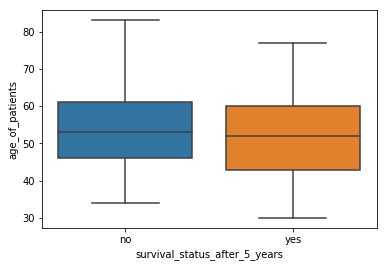

In [6]:
sns.boxplot(x='survival_status_after_5_years',y='age_of_patients', data=haberman)
plt.show()

# Observations
  #### (1) As we can from the box-plot in which the independent terms in the age of patients that both class of patients with survival status as 'yes' and 'no' have about same 50 percentile value which is around 55 years of age.
  #### (2) All the patients with status as 'yes' were situated between the age group of around 30 years of age till 78 years of age.
  #### (3) All the patients with status as 'no' were situated between the age group of around 35 years of age till 83 years of age.
  

# (9) Violin Plots

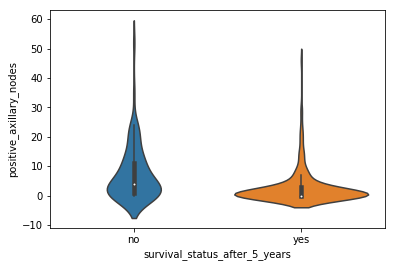

In [10]:
sns.violinplot(x='survival_status_after_5_years',y='positive_axillary_nodes', data=haberman, size=60)
plt.show()

# Observations
  #### (1) From this Violin plot we can see that patients with survival status as 'yes' had their 50th percentile and 25th percentile of the postive axillary nodes values same which was around at zero
  #### (2) The Violin plot also demonstrate the the positive axillary nodes status of patients with survival status as 'no' which has the 50th percentile value around at 5.
  #### (3) This graph also shows PDF of the patients with survival status as both 'yes' as well as 'no.

# Observation
  #### We can see the quantile values for positive axillary nodes for the age group of patients.

# (10) Contour Plot

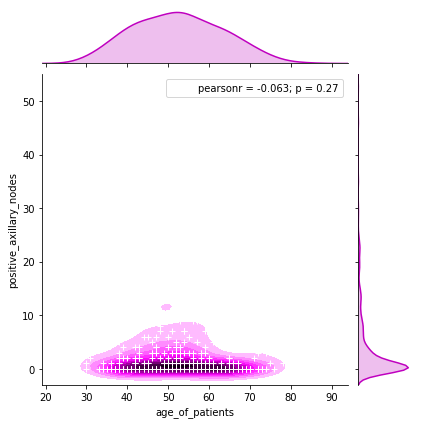

In [12]:
g = sns.jointplot(x='age_of_patients',y='positive_axillary_nodes',
                  data=haberman, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('age_of_patients','positive_axillary_nodes');

# Observation
 #### Many of the points are situated between the age of 40 to 68 and have positive axillary values between 0 to 3